In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns

Задание № 1 (Обязательно) Вам даны результаты проверки двух препаратов.
Требуется:

Оценить, есть ли различие в эффекте у этих пациентов?
Визуально подтвердить результат
A - результаты для группы людей получающих препарат А.

B - результаты для другой группы людей, получающих препарат B.

Statistics=1930.000, p=0.041


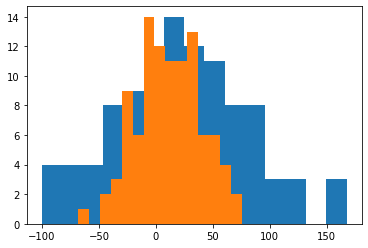

In [6]:
from scipy.stats import wilcoxon # используем его, т.к. выборки зависимы B = A + 

np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

plt.hist(B, bins=15)
plt.hist(A, bins=15)

stat, p = wilcoxon(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))

существенные различия в эффекте двух препаратов есть, т.к. p_value =  0.041 < уровня значимости 0.05

Задание № 2 (Обязательно) Вам даны результаты проверки двух препаратов.
Требуется:

Оценить, есть ли различие в эффекте у этих пациентов?
Визуально подтвердить результат
А - группа людей без препарата.
B - та же группа людей, но получающая препарат

In [7]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# не очень понятно, почему выборки те же самые, а тест нужно применять другой?? попробуем критерий Манна-Уитни
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(A, B) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=4343.000, p=0.054


по этому критерию получили p=0.054 > 0.05, следовательно различий в эффекте нет

In [8]:
t, p_value = stats.ttest_ind(A, B) #Критерий Стьюдента (t-test)
t, p_value

(-1.733800647210997, 0.08451003973499756)

In [ ]:
по критерию Стьюдента получили p=0.084 > 0.05, аналогичый результат

Задание № 3 (Обязательно) Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой.
Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?
Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью boxplot или hist
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [11]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

from scipy.stats import f_oneway

F, p = f_oneway(nutri, mineral)  # дисперсионный анализ (ДА) в python

print(F, p)   # Смотрим на результаты ДА

18.128724672228838 0.0001213673340124552


p = 0.0001 < 0.05, следовательно эффект удобрений в сравнении с минералкой есть

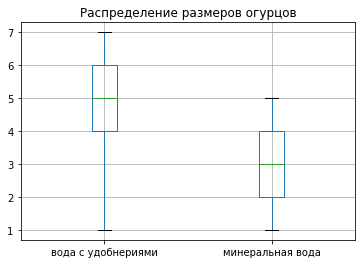

Text(0.5, 1.0, 'Распределение оценок критиков')

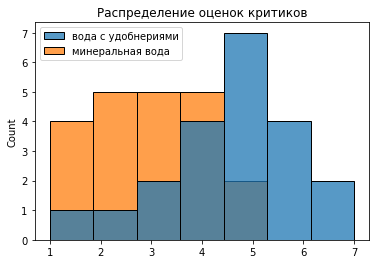

In [27]:
df = pd.DataFrame()
df['вода с удобнериями'] = nutri
df['минеральная вода'] = mineral

df[['вода с удобнериями', 'минеральная вода']].plot(kind='box', title='Распределение размеров огурцов', grid=True)
plt.show()

sns.histplot(df[['вода с удобнериями', 'минеральная вода']])
plt.title('Распределение размеров огурцов')

Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, 
с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

pid: Numeric - ID покемона
HP: Numeric - Очки здоровья
Attack: Numeric - Сила обычной атаки
Defense: Numeric - Сила обычной защиты
Sp. Atk: Numeric - Сила специальной атаки
Sp. Def: Numeric - Сила специальной защиты
Speed: Numeric - Скорость движений
Legendary: Boolean - «True», если покемон редкий
Class 1: Categorical - Класс покемона
Class 2: Categorical - Класс покемона
    
    

In [110]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head(30)

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False


Задание № 1 (Обязательно):
Профессор Оук подозревает, что покемоны в классе grass имеют более сильную обычную атаку, чем у покемонов в классе rock. Проверьте, прав ли он, и убедите его в своем выводе статистически.

Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;

Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [32]:
pokemon[((pokemon['Class 2'] == 'Grass') & (pokemon['Class 1'] == 'Rock')) | ((pokemon['Class 2'] == 'Rock') 
                                                                              & (pokemon['Class 1'] == 'Grass'))].head()


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
377,378,Lileep,Rock,Grass,66,41,77,61,87,23,False
378,379,Cradily,Rock,Grass,86,81,97,81,107,43,False


In [71]:
pokemon_ = pokemon[(pokemon.pid != 378) & (pokemon.pid != 379)] # отбрасываем тех, у кого оба класса

In [72]:
pokemon_grass = pokemon_[((pokemon_['Class 2'] == 'Grass')| (pokemon_['Class 1'] == 'Grass'))][['Attack']]
pokemon_rock = pokemon_[((pokemon_['Class 2'] == 'Rock')| (pokemon_['Class 1'] == 'Rock'))][['Attack']]

t, p_value = stats.ttest_ind(pokemon_grass['Attack'], pokemon_rock['Attack']) #Критерий Стьюдента (t-test)
t, p_value

(-3.729457582692065, 0.00027333381459902653)

вывод: p = 0.0002, следовательно покемоны Grass имеют более сильную обычную атаку, чем у покемонов в классе rock

Text(0.5, 1.0, 'Распределение силы атаки покемонов Grass и Rock')

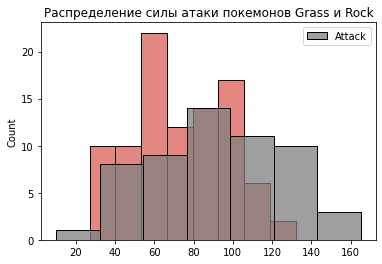

In [73]:
sns.histplot(pokemon_grass, palette='hls')
sns.histplot(pokemon_rock, palette='gist_yarg')
plt.title('Распределение силы атаки покемонов Grass и Rock')

In [ ]:
Задание № 2 (Обязательно):
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе Water
в среднем более быстрые, чем покемоны в классе Normal.

Проверьте, прав ли он, и убедите его в своем выводе статистически.

Примечание: если есть покемоны относятся к обоим классам, выбросьте их;

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [70]:
pokemon[((pokemon['Class 2'] == 'Water') & (pokemon['Class 1'] == 'Normal')) | ((pokemon['Class 2'] == 'Normal') 
                                                                                & (pokemon['Class 1'] == 'Water'))].head()


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
445,446,Bibarel,Normal,Water,79,85,60,55,60,71,False


In [75]:
pokemon_= pokemon[pokemon.pid != 446] # отбрасываем тех, у кого оба класса

In [83]:
pokemon_water = pokemon_[((pokemon_['Class 2'] == 'Water') | (pokemon_['Class 1'] == 'Water'))][['Speed']]
pokemon_normal = pokemon_[((pokemon_['Class 2'] == 'Normal') | (pokemon_['Class 1'] == 'Normal'))][['Speed']]

t, p_value = stats.ttest_ind(pokemon_water['Speed'], pokemon_normal['Speed']) #Критерий Стьюдента (t-test)
t, p_value
#pokemon_water.describe(), pokemon_normal.describe()

(-2.150913330007121, 0.03255353551391033)

p =  0.03 < 0.05, следовательно подтверждаем гипотезу, что покемоны в классе Water в среднем более быстрые, чем покемоны в классе Normal 

Text(0.5, 1.0, 'Распределение скорости покемонов Water и Normal')

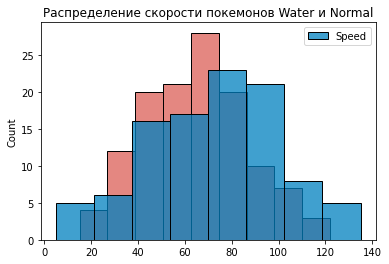

In [78]:
sns.histplot(pokemon_water, palette='hls')
sns.histplot(pokemon_normal, palette='winter')
plt.title('Распределение скорости покемонов Water и Normal')

Задание № 3:
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив treathed_pokemon. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>


In [99]:
pokemon_legend = pokemon[pokemon['Legendary']]
pokemon_legend['sum'] = pokemon_legend['HP'] + pokemon_legend['Attack'] + pokemon_legend['Defense']
pokemon_legend['comp'] = pokemon_legend['HP'] * pokemon_legend['Attack'] * pokemon_legend['Defense']

pokemon_other = pokemon[pokemon['Legendary'] == False]
pokemon_other['sum'] = pokemon_other['HP'] + pokemon_other['Attack'] + pokemon_other['Defense']
pokemon_other['comp'] = pokemon_other['HP'] * pokemon_other['Attack'] * pokemon_other['Defense']


t, p_value = stats.ttest_ind(pokemon_legend['sum'], pokemon_other['sum']) #Критерий Стьюдента (t-test)
print(t, p_value)
F, p = f_oneway(pokemon_legend['sum'], pokemon_other['sum'])  # дисперсионный анализ (ДА) в python
print(F, p) 

t, p_value = stats.ttest_ind(pokemon_legend['comp'], pokemon_other['comp']) #Критерий Стьюдента (t-test)
print(t, p_value)
F, p = f_oneway(pokemon_legend['comp'], pokemon_other['comp'])  # дисперсионный анализ (ДА) в python
print(F, p) 


11.591852366462316 7.970942205722087e-29
134.37104128585798 7.970942205720804e-29
13.263253408231844 1.992664308842282e-36
175.9138909709736 1.9926643088419018e-36


<ipython-input-99-85ddddd597bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_legend['sum'] = pokemon_legend['HP'] + pokemon_legend['Attack'] + pokemon_legend['Defense']
<ipython-input-99-85ddddd597bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_legend['comp'] = pokemon_legend['HP'] * pokemon_legend['Attack'] * pokemon_legend['Defense']
<ipython-input-99-85ddddd597bc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

Text(0.5, 1.0, 'Распределение скорости покемонов Water и Normal')

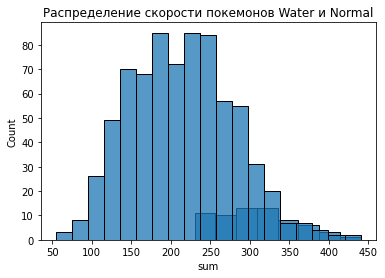

In [100]:
sns.histplot(pokemon_legend['sum'], palette='gist_yarg')
sns.histplot(pokemon_other['sum'], palette='winter')
plt.title('Распределение суммы показателей легендарных и обычых покемонов')

Text(0.5, 1.0, 'Распределение произведения показателей легендарных и обычых покемонов')

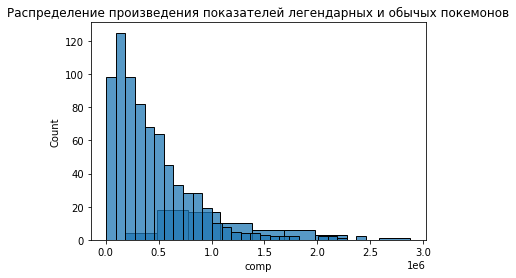

In [101]:
sns.histplot(pokemon_legend['comp'], palette='gist_yarg')
sns.histplot(pokemon_other['comp'], palette='winter')
plt.title('Распределение произведения показателей легендарных и обычых покемонов')

вывод: исходя из тестов (стьюдента и ДА, которые дали похожие результаты), легендарные покемоны действительно лучше остальных

Задание № 6:
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса best_defence_class, которые на его взгляд одинаковы по "силе обычной защиты" Defense. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь!

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

In [103]:
best_defence_class = ['Rock', 'Ground','Steel']

In [112]:
F, p = f_oneway(pokemon[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]['Defense'],
                pokemon[(pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground')]['Defense'],
               pokemon[(pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel')]['Defense'])  
# дисперсионный анализ (ДА) в python
print(F, p)

8.682104564943515 0.000256333515308276


p = 0.0002 < 0.05, следовательно покемоны этих 3х классов отличаются статистически значимо